In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset using pandas
filename = "../../input/prophet/TSLA_5yr.csv"
data = pd.read_csv(filename) 
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,259.079987,262.950012,256.790009,257.920013,257.920013,3334100
1,2015-07-10,262.220001,263.000000,257.820007,259.149994,259.149994,2610900
2,2015-07-13,262.250000,262.549988,256.049988,262.160004,262.160004,2960300
3,2015-07-14,262.100006,265.989990,260.510010,265.649994,265.649994,1907600
4,2015-07-15,266.739990,267.489990,262.079987,263.140015,263.140015,2021600


In [2]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,322.066799,328.506767,315.492176,322.307713,322.307713,7.951710e+06
std,164.242948,169.589786,158.892512,164.858451,164.858451,5.857821e+06
min,142.320007,154.970001,141.050003,143.669998,143.669998,7.080000e+05
25%,229.310005,232.125000,225.315002,229.434998,229.434998,4.312950e+06
50%,283.519989,289.200012,278.649994,284.540009,284.540009,6.158400e+06
75%,339.625000,344.940002,333.610000,338.800003,338.800003,9.298800e+06
max,1405.010010,1429.500000,1336.709961,1389.859985,1389.859985,6.093880e+07


In [3]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,2015-07-09,257.920013
1,2015-07-10,259.149994
2,2015-07-13,262.160004
3,2015-07-14,265.649994
4,2015-07-15,263.140015


In [4]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

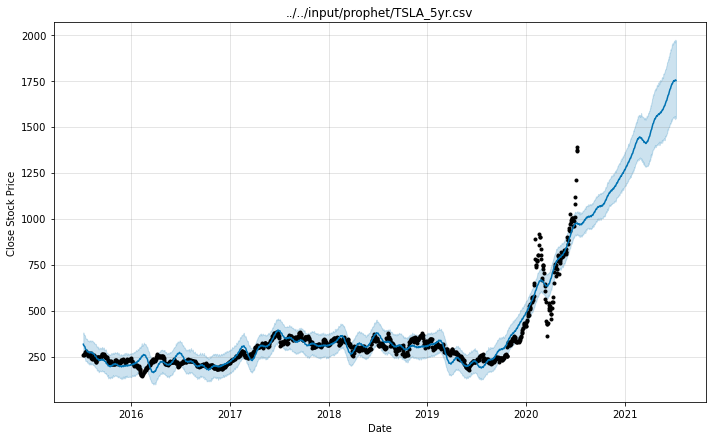

In [5]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title(filename)
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

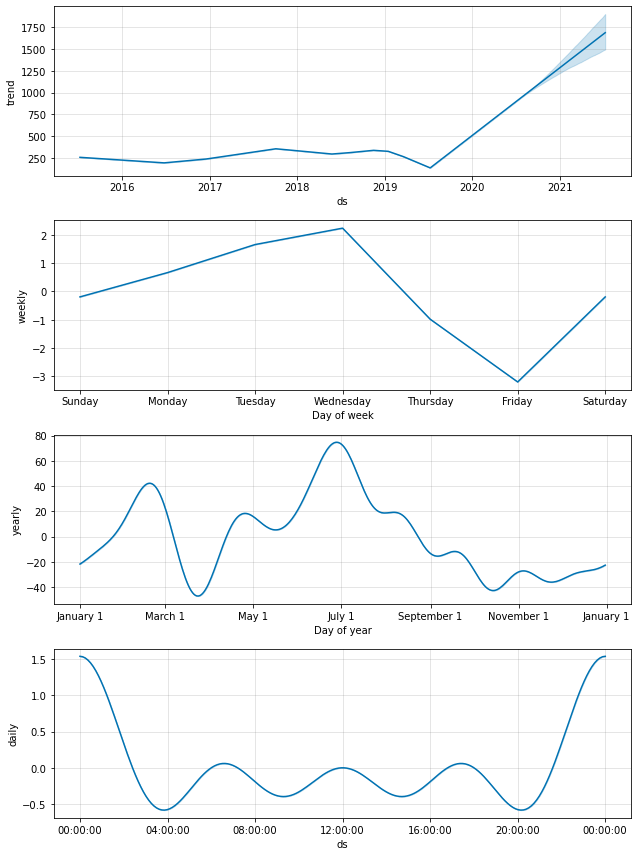

In [6]:
m.plot_components(prediction)
plt.show()